In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.interpolate as spi

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 2, 4, 8, 16]
#true_nlist = list(range(2, 21))
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
# wrong_nlist = [round((tnn-2*m)/(1-m),4) for tnn in true_nlist]
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
sclist = [0.05, 0.1, 0.5]
L = 1.0
num_empty = 200
res_dir = 'nsc-setisaturday-numempty200'
randix = 0
plt.rcParams['figure.constrained_layout.use'] = True

In [3]:
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        if sc == 0.05:
            fout = (
                f"{res_dir}/D={D}_n={n:.5f}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
            )
            res = pd.read_csv(fout+'_civs.csv')
        else:
            fout = (
                f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
            )
            res = pd.read_csv(fout+'.csv')
        true_n = true_nlist[nix]

        fig = plt.figure()
        (counts, bins, patches) = plt.hist(
            res.NumberSeen+1, cumulative=True, histtype='step', 
            density=True, bins=res.shape[0])
        fig.clf()
        plot_data[(true_n, sc)] = (bins[0:-1], counts)

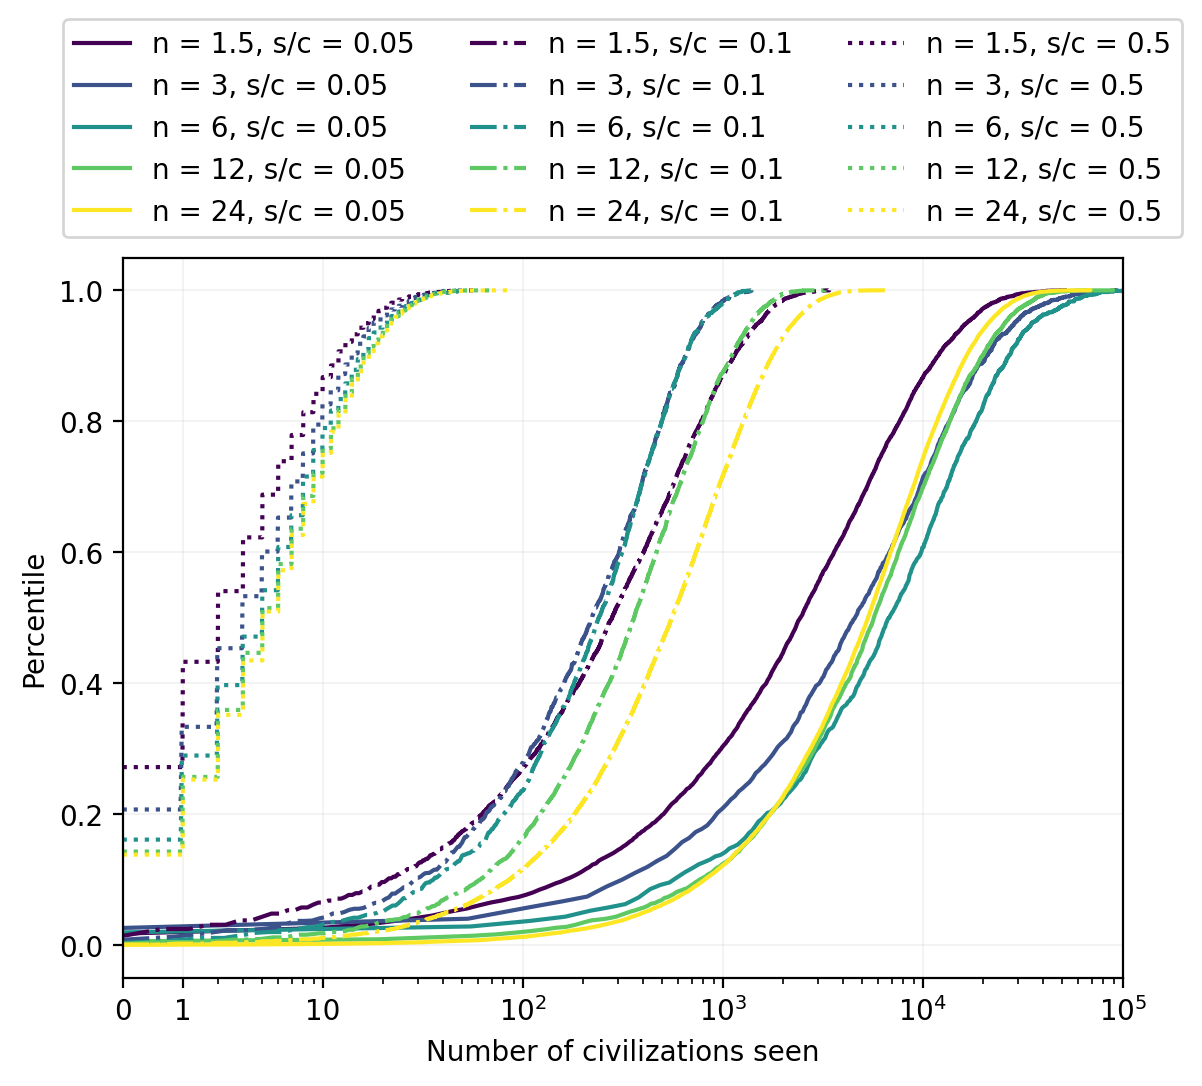

In [14]:
fig = plt.figure(figsize=(5,6),dpi=200)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
plt.gca().set_position([0.0,1.0,1.0,0.60])
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Number of civilizations seen');
#plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
plt.gca().set_xscale('log')
#plt.gca().set_xticks([1, 10, 100, 1000]);
#plt.gca().set_xticklabels(['0', '9', '99', '999']);
#plt.gca().set_xticks([1, 2, 11, 101, 1001]);
#plt.gca().set_xticklabels([0, 1, 10, 100, 1000]);
#plt.gca().set_xticks([1, 2, 10, 11]);#, 1e+1, 11,  1e+2, 101, 1e+3, 1001]);
#plt.gca().set_xticks([1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]);
plt.gca().set_xticks([1, 2, 10, 100, 1000, 10000, 100000]);
plt.gca().set_xticklabels([0, '1', 10, '$10^2$', '$10^3$', '$10^4$', '$10^5$']);
plt.gca().set_xlim(1, 100000)
plt.legend(leg, loc = 'upper center', bbox_to_anchor = (0.5, 1.35), ncol=3)
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotF-legendabove-s05.png', dpi=200, bbox_inches = 'tight');

In [ ]:
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
n_perms = 5
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        interp_bins = np.linspace(0, 3000.0, 100000)
        interp_counts = np.zeros((n_perms, 100000))
        for randix in range(0, n_perms):
            true_n = true_nlist[nix]
            fout = (
                f"nsc-boundary/D={D}_n={float(n)}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
            )
            res = pd.read_csv(fout+'.csv')
            fig = plt.figure()
            (counts, bins, patches) = plt.hist(
                res.NumberSeen+1, cumulative=True, histtype='step', 
                density=True, bins=res.shape[0])  
            fig.clf()
            interp_f = spi.interp1d(bins[0:-1], counts, bounds_error=False)
            interp_counts[randix,:] = interp_f(interp_bins)           
        plot_data[(true_n, sc)] = (interp_bins, np.mean(interp_counts, axis=0))

[0.  0.2 0.4 0.6 0.8 1. ]
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


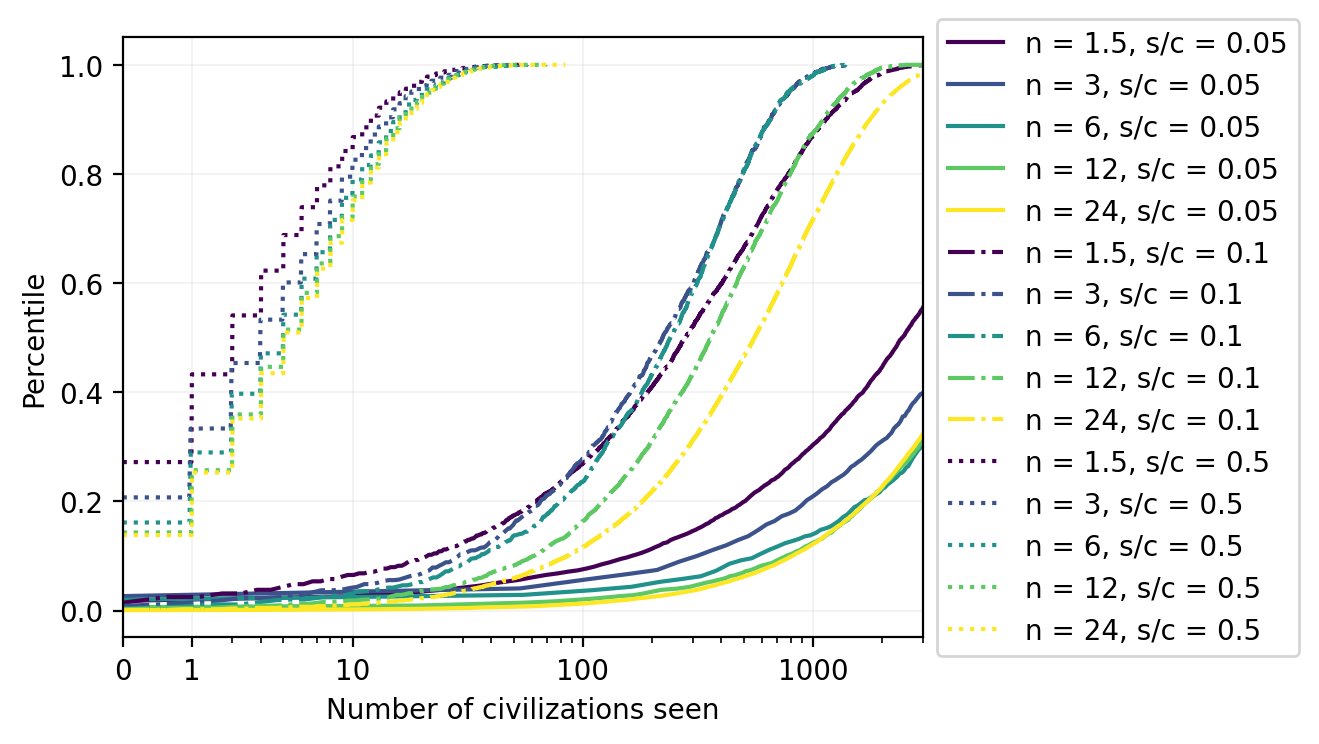

In [4]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
ax.set_position([0.1,0.15,0.5,0.75])
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Number of civilizations seen');
#plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
plt.gca().set_xscale('log')
#plt.gca().set_xticks([1, 10, 100, 1000]);
#plt.gca().set_xticklabels(['0', '9', '99', '999']);
#plt.gca().set_xticks([1, 2, 11, 101, 1001]);
#plt.gca().set_xticklabels([0, 1, 10, 100, 1000]);
#plt.gca().set_xticks([1, 2, 10, 11]);#, 1e+1, 11,  1e+2, 101, 1e+3, 1001]);
#plt.gca().set_xticks([1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]);
plt.gca().set_xticks([1, 2, 10, 100, 1000]);
plt.gca().set_xticklabels([0, '1', 10, 100, 1000]);
plt.gca().set_xlim(1, 3000)
plt.legend(leg, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotF.png', dpi=200);
print(plt.gca().get_xticks())
print(plt.gca().get_xticklabels())

In [ ]:
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
ax.set_position([0.1,0.15,0.5,0.75])
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Number of civilizations seen');
#plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
#plt.gca().set_xticks([1, 10, 100, 1000]);
#plt.gca().set_xticklabels(['0', '9', '99', '999']);
#plt.gca().set_xticks([1, 2, 11, 101, 1001]);
#plt.gca().set_xticklabels([0, 1, 10, 100, 1000]);
#plt.gca().set_xticks([1, 2, 10, 11]);#, 1e+1, 11,  1e+2, 101, 1e+3, 1001]);
#plt.gca().set_xticks([1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]);
plt.gca().set_xticks([1, 2, 10, 100, 1000]);
plt.gca().set_xticklabels([0, '1', 10, 100, 1000]);
plt.gca().set_xlim(1, 3000)
plt.legend(leg, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotF-loglog.png', dpi=200);

[0.  0.2 0.4 0.6 0.8 1. ]
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


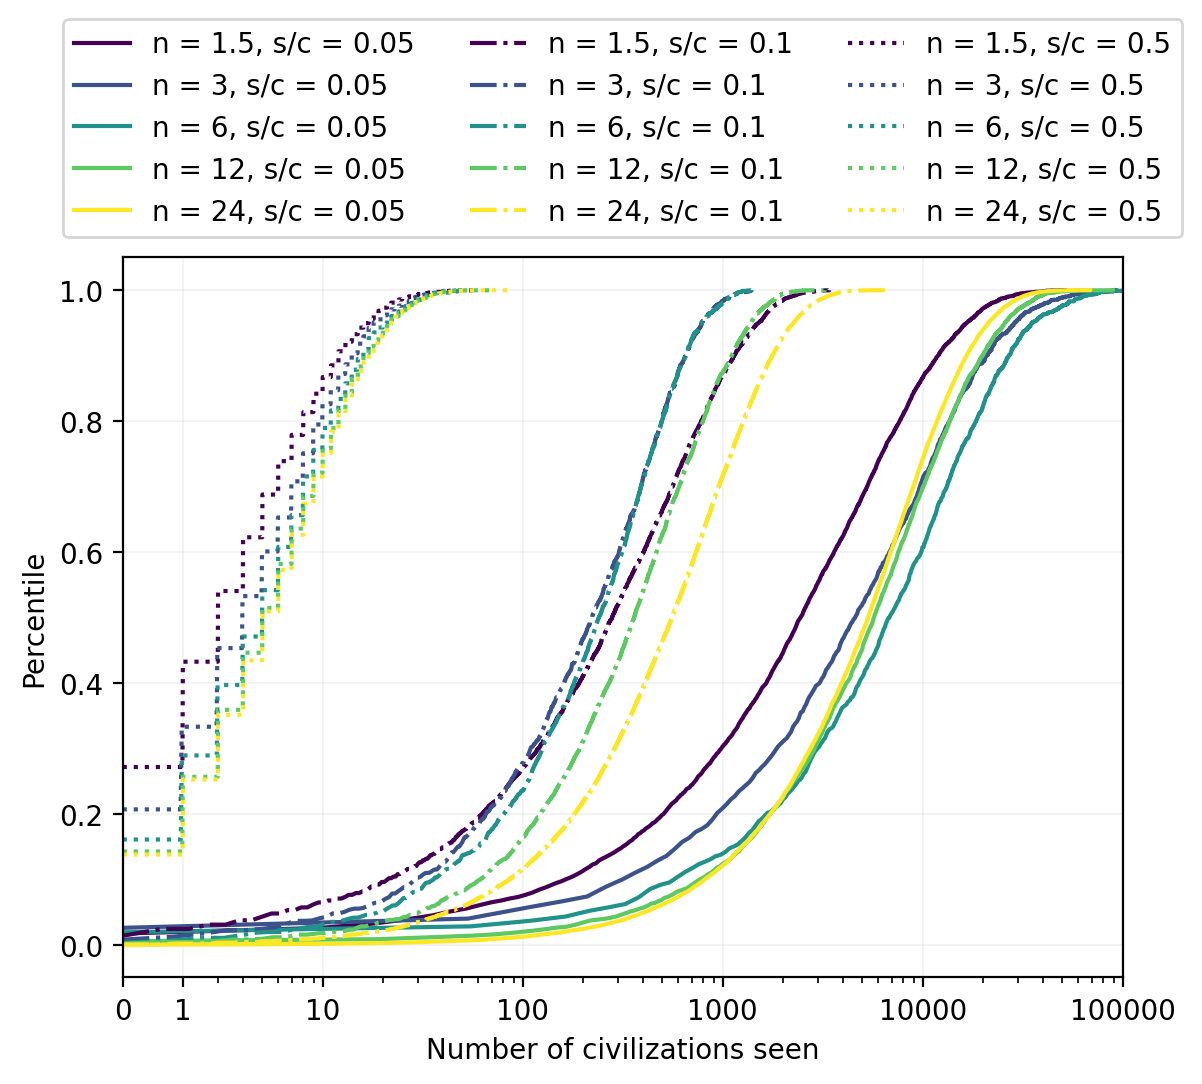

In [9]:
fig = plt.figure(figsize=(5,6),dpi=200)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
plt.gca().set_position([0.0,1.0,1.0,0.60])
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Number of civilizations seen');
#plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
plt.gca().set_xscale('log')
#plt.gca().set_xticks([1, 10, 100, 1000]);
#plt.gca().set_xticklabels(['0', '9', '99', '999']);
#plt.gca().set_xticks([1, 2, 11, 101, 1001]);
#plt.gca().set_xticklabels([0, 1, 10, 100, 1000]);
#plt.gca().set_xticks([1, 2, 10, 11]);#, 1e+1, 11,  1e+2, 101, 1e+3, 1001]);
#plt.gca().set_xticks([1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]);
plt.gca().set_xticks([1, 2, 10, 100, 1000, 10000, 100000]);
plt.gca().set_xticklabels([0, '1', 10, 100, 1000, 10000, 100000]);
plt.gca().set_xlim(1, 100000)
plt.legend(leg, loc = 'upper center', bbox_to_anchor = (0.5, 1.35), ncol=3)
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotF-legendabove.png', dpi=200, bbox_inches = 'tight');
print(plt.gca().get_xticks())
print(plt.gca().get_xticklabels())